<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/basic-neural-networks/simple_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple MLP for XOR

### **01. XOR Dataset**

We define the XOR dataset, which we want our neural network to learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input (XOR inputs) and target output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

*Explanation:*

This is the truth table of the XOR logic gate. Our model should learn to map these inputs to the correct outputs.

### **02. Activation Function and Derivative**

We define the sigmoid activation function, commonly used in MLPs, and its derivative.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

*Explanation:*

The sigmoid squashes input to range (0, 1). Its derivative is needed for backpropagation.

### **03. Initialize Weights and Biases**

We randomly initialize weights and biases for the input and hidden layers.

In [4]:
np.random.seed(42)  # for reproducibility

input_dim = 2
hidden_dim = 2
output_dim = 1

# Weights and biases
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

*Explanation:*

We use 2 neurons in the hidden layer. The weights and biases will be updated using gradient descent.

### **04. Training Loop (Forward + Backward)**

We manually implement the forward and backward pass to update weights using gradient descent.

In [5]:
lr = 0.1
epochs = 10000
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (mean squared error)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Backpropagation
    d_a2 = a2 - y
    d_z2 = d_a2 * sigmoid_derivative(z2)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(z1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Gradient descent updates
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

*Explanation:*

This loop trains the MLP using basic backpropagation. Gradients are computed manually.

### **05. Output and Evaluation**

In [6]:
# Predictions
print("Predictions after training:")
print(np.round(a2))

Predictions after training:
[[0.]
 [0.]
 [1.]
 [1.]]


*Explanation:*

After training, the model should correctly output [0, 1, 1, 0] for XOR inputs.

### **06. Plot Loss Curve**

We visualize how the loss decreases during training.

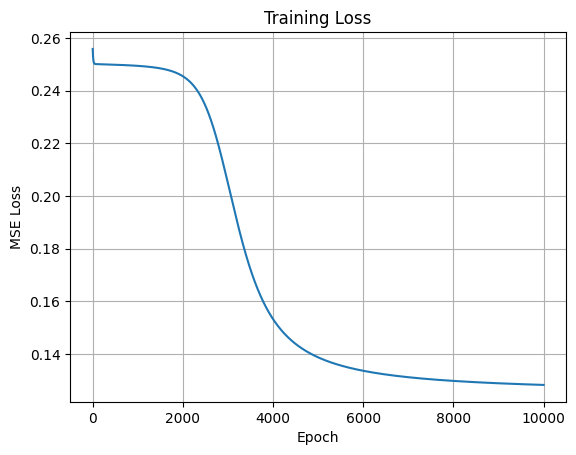

In [7]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

*Explanation:*

This shows that the model is learning by observing the reduction in loss over time.